# most streamed spotify songs 2023


In [112]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#import dataset and show first 10 rows

spot_2023=pd.read_csv("spotify-2023.csv", encoding='latin1')
spot_2023.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [114]:
#chheck if theres anyy missing values

missing_values=spot_2023.isnull().sum()
missing_values[missing_values>0]
# Fill missing values with 0

spot_2023.fillna(0, inplace=True)

#general statistics

stats=spot_2023.describe()
stats



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [115]:
#changing streams column data type

spot_2023['streams'] = pd.to_numeric(spot_2023['streams'], errors='coerce')
spot_2023.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [116]:
#songs released by the years 
yearly_release=spot_2023["released_year"].value_counts()
yearly_release.head()

2022    402
2023    175
2021    119
2020     37
2019     36
Name: released_year, dtype: int64

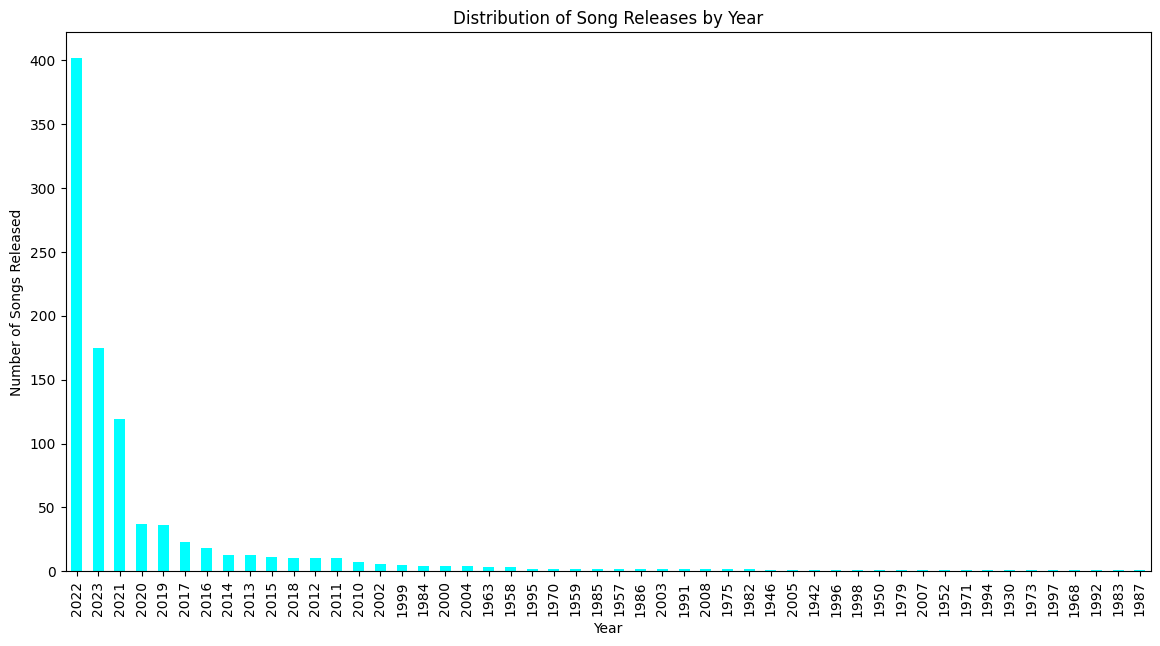

In [117]:
#songs distribution of song releases by year plot

plt.figure(figsize=(14, 7))
yearly_release.plot(kind='bar', color='cyan')
plt.title('Distribution of Song Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.show()

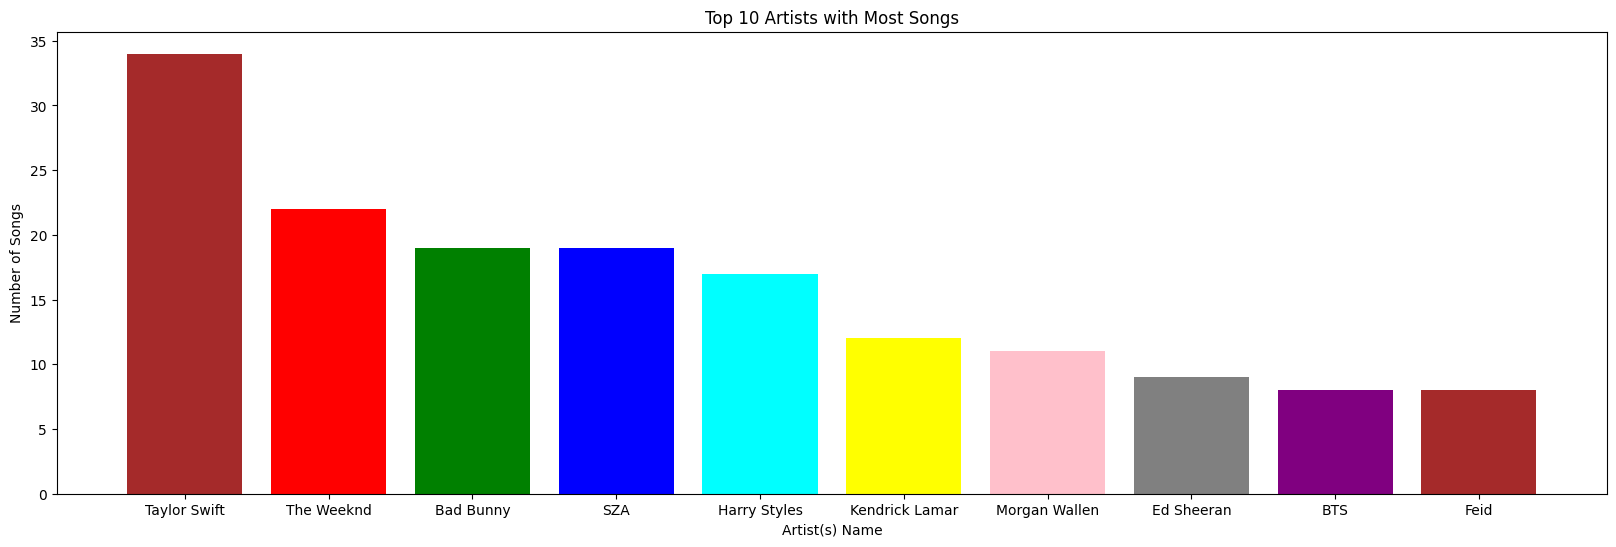

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

In [124]:
#Top 10 Artists with Most Songs bar plot

top_artists=spot_2023["artist(s)_name"].value_counts().head(10)

#the plot
plt.figure(figsize=(20, 6))

plt.bar(top_artists.index , top_artists.values,color=['brown', 'red', 'green', 'blue', 'cyan',"yellow","pink","gray","purple"])
plt.ylabel('Number of Songs')
plt.xlabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()
top_artists

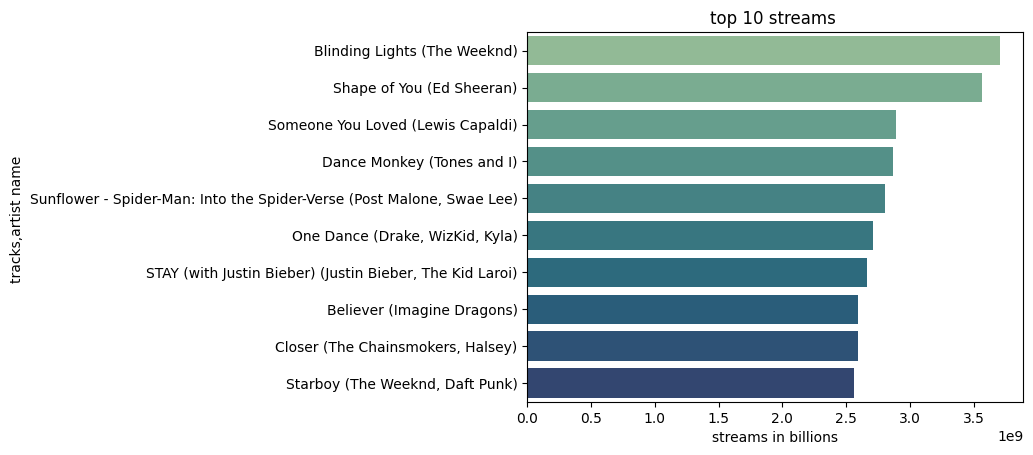

,track_name,artist(s)_name,streams,track_artist
55,Blinding Lights,The Weeknd,3.703895e+09,Blinding Lights (The Weeknd)
179,Shape of You,Ed Sheeran,3.562544e+09,Shape of You (Ed Sheeran)
86,Someone You Loved,Lewis Capaldi,2.887242e+09,Someone You Loved (Lewis Capaldi)
620,Dance Monkey,Tones and I,2.864792e+09,Dance Monkey (Tones and I)
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09,Sunflower - Spider-Man: Into the Spider-Verse ...
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09,"One Dance (Drake, WizKid, Kyla)"
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09,"STAY (with Justin Bieber) (Justin Bieber, The ..."
140,Believer,Imagine Dragons,2.594040e+09,Believer (Imagine Dragons)
725,Closer,"The Chainsmokers, Halsey",2.591224e+09,"Closer (The Chainsmokers, Halsey)"
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09,"Starboy (The Weeknd, Daft Punk)"


In [119]:
#Top 10 streamed songs

top_songs=spot_2023[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
#combined column for track and artist name 
top_songs['track_artist'] = top_songs['track_name'] + " (" + top_songs['artist(s)_name'] + ")"
#the plot
sns.barplot(x=top_songs["streams"],y=top_songs["track_artist"],palette="crest")
plt.xlabel("streams in billions")
plt.ylabel("tracks,artist name ")
plt.title("top 10 streams ")
plt.show()
top_songs

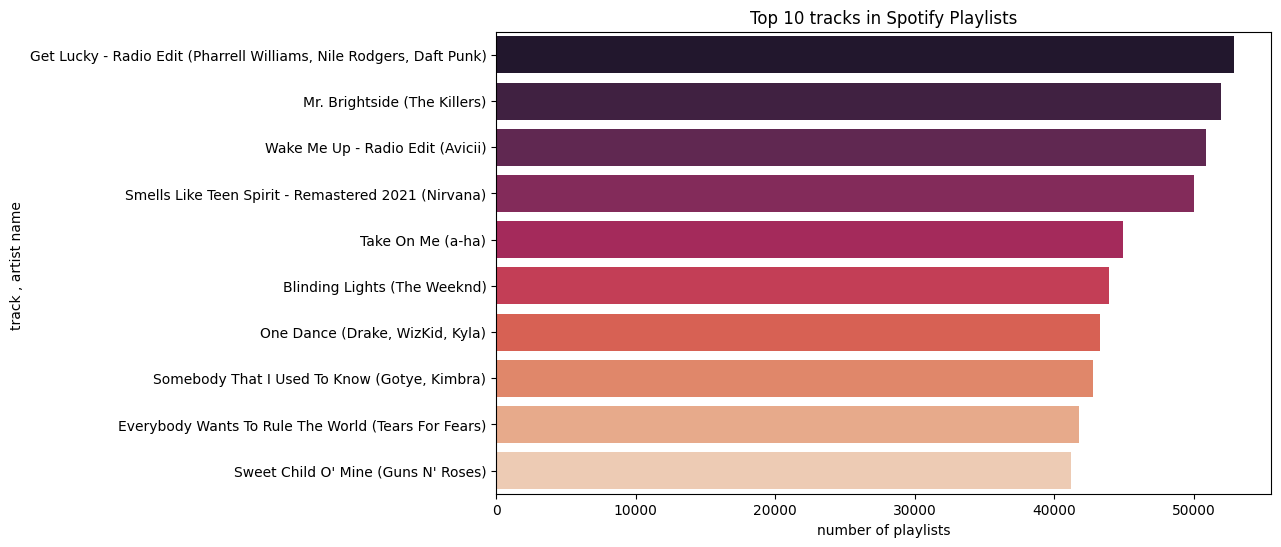

In [122]:
# top 10 songs in Spotify playlists
top_in_playlists = spot_2023.sort_values(by='in_spotify_playlists', ascending=False).head(10)

#combined column for track and artist name 
top_in_playlists['track_artist'] = top_in_playlists['track_name'] + " (" + top_in_playlists['artist(s)_name'] + ")"

# the Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_in_playlists['in_spotify_playlists'], y=top_in_playlists['track_artist'],palette="rocket")
plt.xlabel('number of playlists')
plt.ylabel('track , artist name ')
plt.title('Top 10 tracks in Spotify Playlists')
plt.show()

In [28]:
#selecting rows between 2022 and 2023
released_22_23=spot_2023[spot_2023["released_year"].isin([2022,2023])]
released_22_23.reset_index(inplace=True,drop=True)
released_22_23.head(10)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
4,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
5,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112.0,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
6,Columbia,Quevedo,1,2023,7,7,714,43,58149378.0,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
7,fukumean,Gunna,1,2023,5,15,1096,83,95217315.0,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
8,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067.0,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33
9,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438.0,41,205,54,12,251,83,F#,Minor,57,56,72,23,0,27,5


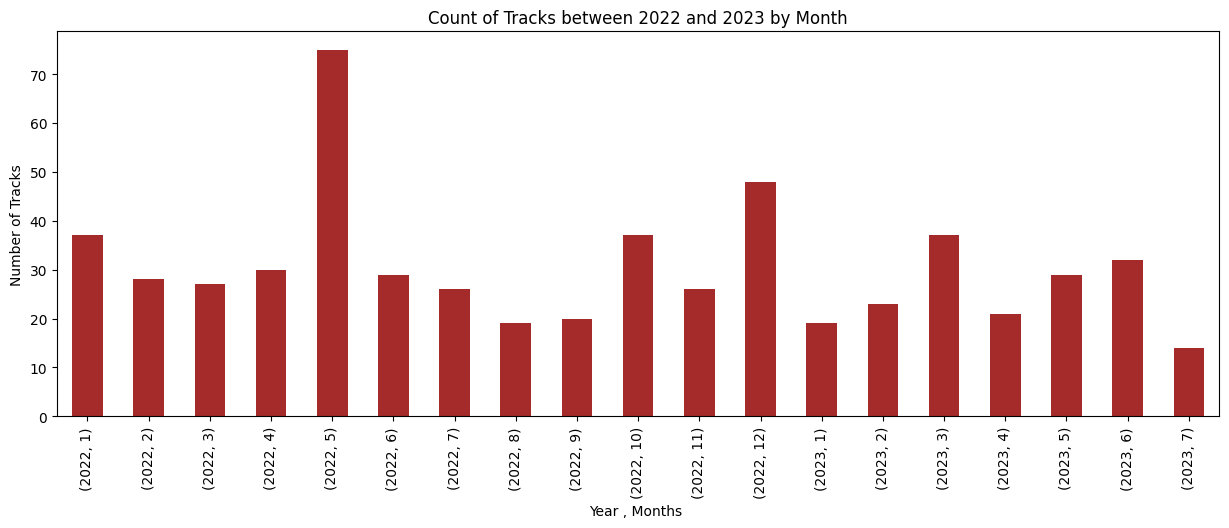

In [29]:
#number of truccks released between 2022 , 2023
year_month=["released_year","released_month"]
gr=released_22_23.groupby(year_month)[year_month].count()
#the bar plot
gr.plot(kind="bar",figsize=(15,5),color="brown")
plt.title('Count of Tracks between 2022 and 2023 by Month')
plt.xlabel('Year , Months ')
plt.ylabel('Number of Tracks')
plt.legend('',frameon=False)
plt.show()

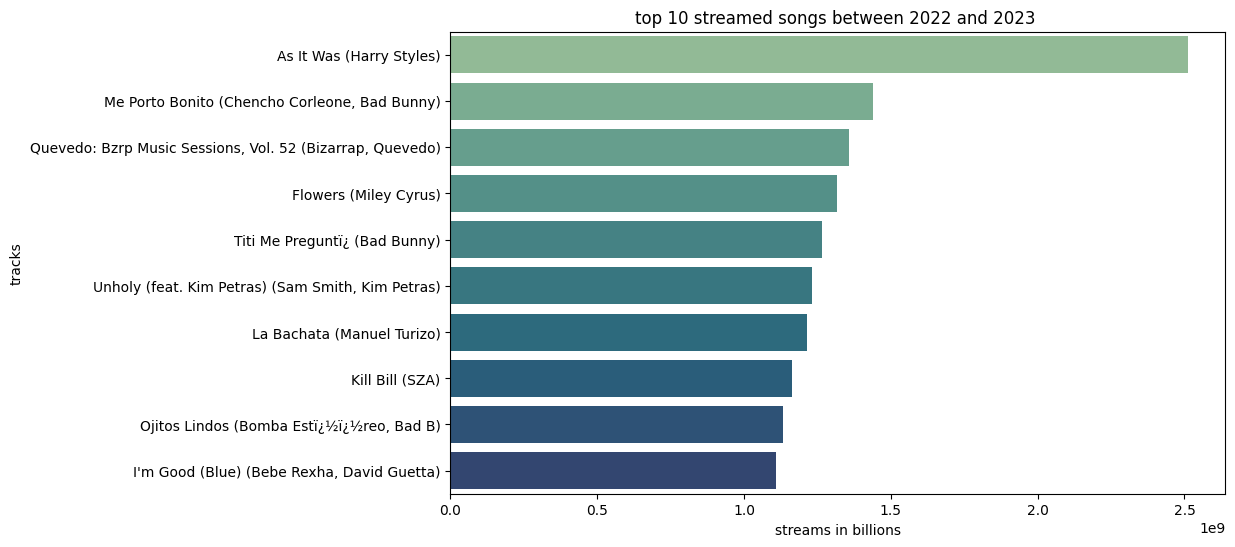

,track_name,artist(s)_name,streams,track_artist
55,Blinding Lights,The Weeknd,3.703895e+09,Blinding Lights (The Weeknd)
179,Shape of You,Ed Sheeran,3.562544e+09,Shape of You (Ed Sheeran)
86,Someone You Loved,Lewis Capaldi,2.887242e+09,Someone You Loved (Lewis Capaldi)
620,Dance Monkey,Tones and I,2.864792e+09,Dance Monkey (Tones and I)
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09,Sunflower - Spider-Man: Into the Spider-Verse ...
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09,"One Dance (Drake, WizKid, Kyla)"
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09,"STAY (with Justin Bieber) (Justin Bieber, The ..."
140,Believer,Imagine Dragons,2.594040e+09,Believer (Imagine Dragons)
725,Closer,"The Chainsmokers, Halsey",2.591224e+09,"Closer (The Chainsmokers, Halsey)"
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09,"Starboy (The Weeknd, Daft Punk)"


In [80]:
#Top 10 streamed songs 2022-2023

top_tracks22_23=released_22_23[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
#combined column for track and artist name 
top_tracks22_23['track_artist'] = top_tracks22_23['track_name'] + " (" + top_tracks22_23['artist(s)_name'] + ")"
#the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks22_23["streams"],y=top_tracks22_23["track_artist"],palette="crest")
plt.xlabel("streams in billions")
plt.ylabel("tracks, artist name")
plt.title("top 10 streamed songs between 2022 and 2023 ")
plt.show()
top_songs

In [32]:
#most used bpms
bpm_counts = spot_2023['bpm'].value_counts()
bpm_counts.head(10)

120    39
140    31
130    31
92     25
110    24
150    21
90     21
122    19
105    19
125    18
Name: bpm, dtype: int64

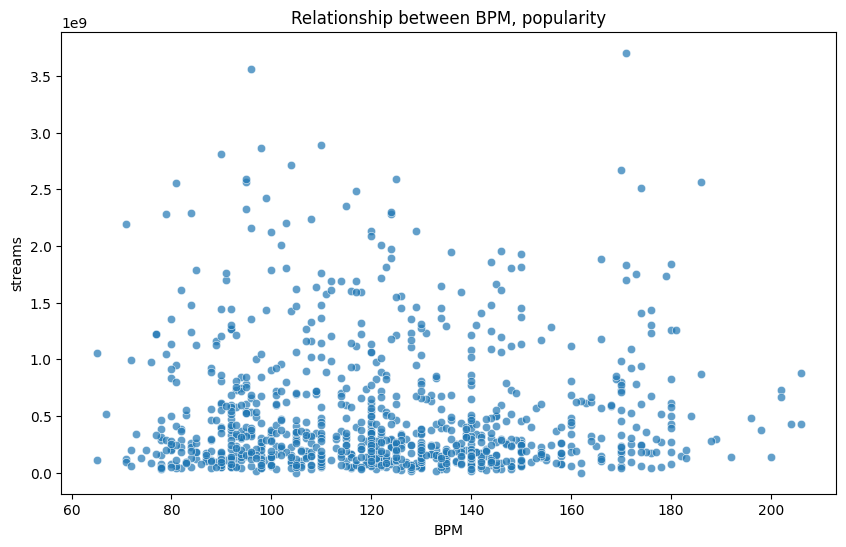

In [76]:
# Scatter plot the relationship between bpm and popularity of the songs

plt.figure(figsize=(10, 6))

sns.scatterplot(x=spot_2023["bpm"], y=spot_2023["streams"].sort_values(), alpha=0.7)
plt.title('Relationship between BPM and number of streams')
plt.xlabel('BPM')
plt.ylabel('streams in billions')
plt.show()

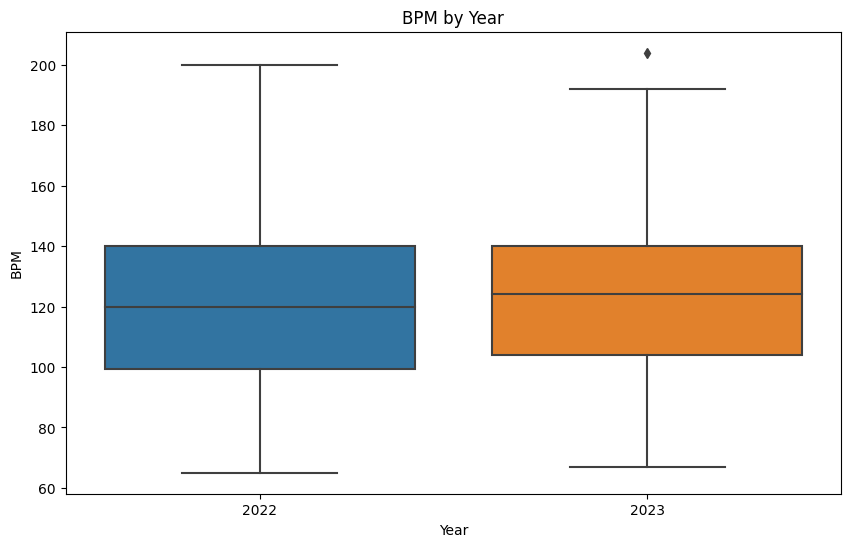

In [66]:
# Plotting BPM by Years 2022 2023

plt.figure(figsize=(10, 6))

sns.boxplot(x=released_22_23['released_year'], y=released_22_23['bpm'])
plt.title('BPM between 2022 and 2023')
plt.xlabel('Year')
plt.ylabel('BPM')
plt.show()


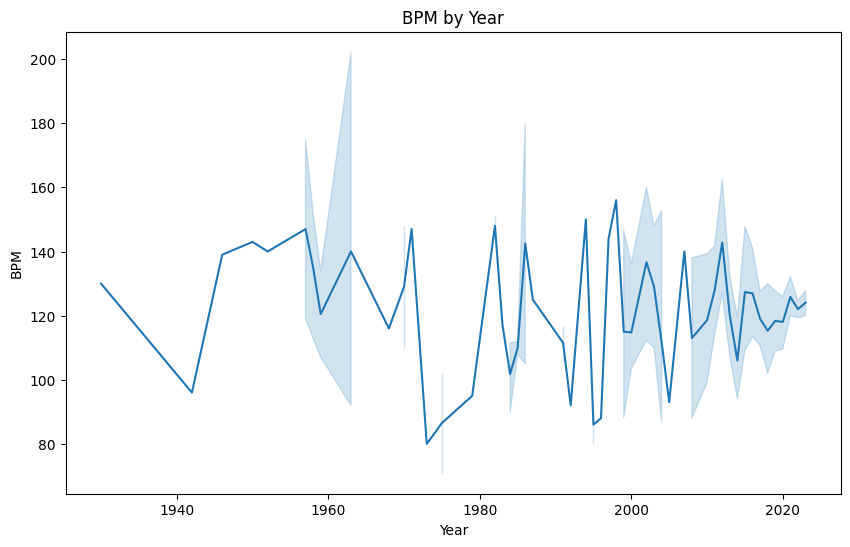

In [72]:
# Plotting BPM by Year

plt.figure(figsize=(10, 6))

sns.lineplot(x=spot_2023['released_year'],y=spot_2023['bpm'])
plt.title('BPM by Year')
plt.xlabel('Year')
plt.ylabel('BPM')
plt.show()

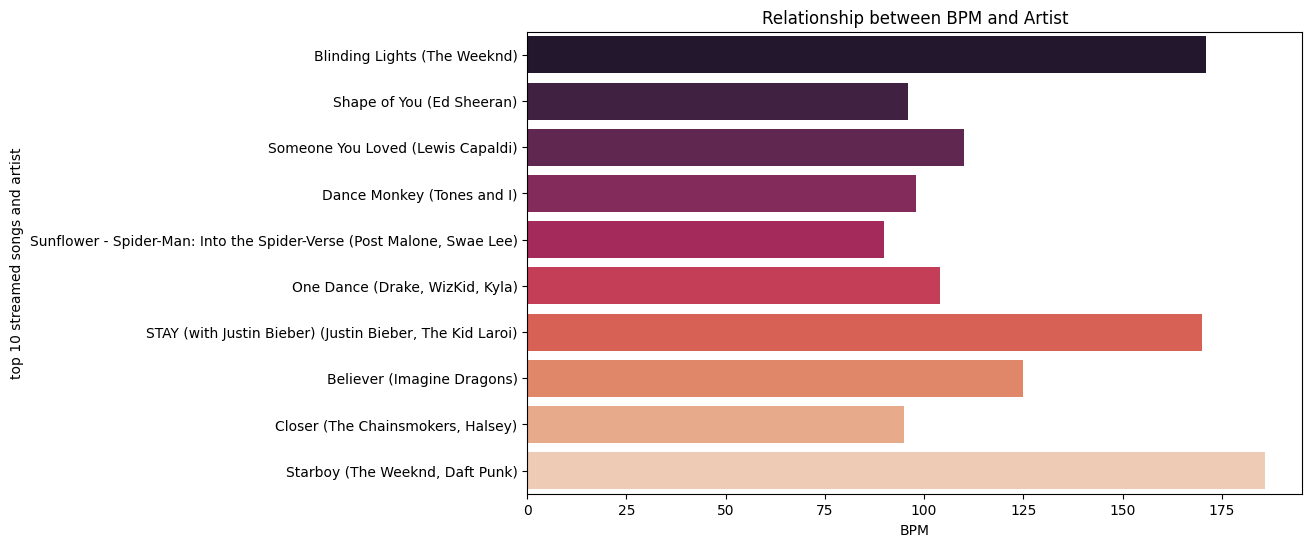

In [121]:
plt.figure(figsize=(10, 6))

sns.barplot(y=top_songs["track_artist"], x=spot_2023["bpm"],palette="rocket")
plt.title('Relationship between BPM and Artist')
plt.xlabel('BPM')
plt.ylabel('top 10 streamed songs and artist')
plt.show()